# Predicting currency price by market data via Random Forest Regression

In [ ]:
#preparing data

In [1]:
import pandas as pd

In [2]:
from talib import abstract
from talib.abstract import *

In [3]:
df1 = pd.read_csv('full.csv')

In [4]:
df2 = pd.read_csv('new_new_full.csv')

In [5]:
df1.head()

,Unnamed: 0,Price,US PMI,EURO PMI,GDP EA19,GDP USA,LTI EA19,LTI USA,STI USA,STI EA19
0,2008-07-31,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
1,2008-10-01,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
2,2008-10-10,1.3414,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
3,2008-10-13,1.3593,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131
4,2008-10-14,1.3624,38.9,41.3,-0.572204,-0.541356,4.4158,3.81,4.32,5.1131


In [6]:
df2.head()

,Date,Price,BoT_EU,CPI_EU,CPI_US,DGO,IP_EU,IR_EU,IR_US,NFP_EU,...,GDP_US,GDP_EU,LTI_US,LTI_EU,STI_US,STI_EU,ST600,BoT_US,IP_US,SP500
0,2008-07-31,1.3414,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,899.22
1,2008-10-01,1.3414,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,899.22
2,2008-10-10,1.3414,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,899.22
3,2008-10-13,1.3593,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,1003.35
4,2008-10-14,1.3624,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,998.01


In [7]:
df1.set_index('Unnamed: 0', inplace = True)

In [8]:
df1.index = pd.to_datetime(df1.index)

In [9]:
df1.index.names = ['Date']

In [10]:
df2.set_index('Date', inplace = True)

In [11]:
df2.index = pd.to_datetime(df2.index)

In [12]:
df2.head()

,Price,BoT_EU,CPI_EU,CPI_US,DGO,IP_EU,IR_EU,IR_US,NFP_EU,NFP_US,...,GDP_US,GDP_EU,LTI_US,LTI_EU,STI_US,STI_EU,ST600,BoT_US,IP_US,SP500
Date,,,,,,,,,,,,,,,,,,,,,
2008-07-31,1.3414,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,-240.0,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,899.22
2008-10-01,1.3414,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,-240.0,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,899.22
2008-10-10,1.3414,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,-240.0,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,899.22
2008-10-13,1.3593,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,-240.0,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,1003.35
2008-10-14,1.3624,-6.1,0.4,0.4,-1.1,1.1,3.25,1.0,-0.1,-240.0,...,-0.541356,-0.572204,3.81,4.4158,4.32,5.1131,290.43,-59.1,-2.8,998.01


In [13]:
df1n = df1[['STI EA19', 'LTI EA19']].copy()

In [15]:
df1n.head()

,STI EA19,LTI EA19
Date,,
2008-07-31,5.1131,4.4158
2008-10-01,5.1131,4.4158
2008-10-10,5.1131,4.4158
2008-10-13,5.1131,4.4158
2008-10-14,5.1131,4.4158


In [16]:
df2n = df2[['Price', 'UR_US', 'PMI_US', 'PMI_EU', 'UR_EU']]

In [17]:
df2n.head()

,Price,UR_US,PMI_US,PMI_EU,UR_EU
Date,,,,,
2008-07-31,1.3414,6.5,38.9,41.3,7.5
2008-10-01,1.3414,6.5,38.9,41.3,7.5
2008-10-10,1.3414,6.5,38.9,41.3,7.5
2008-10-13,1.3593,6.5,38.9,41.3,7.5
2008-10-14,1.3624,6.5,38.9,41.3,7.5


In [18]:
df = pd.merge(df2n, df1n, how='outer', left_index=True, right_index=True)

In [19]:
df = df.fillna(method='ffill')

In [20]:
df.head()

,Price,UR_US,PMI_US,PMI_EU,UR_EU,STI EA19,LTI EA19
Date,,,,,,,
2008-07-31,1.3414,6.5,38.9,41.3,7.5,5.1131,4.4158
2008-10-01,1.3414,6.5,38.9,41.3,7.5,5.1131,4.4158
2008-10-10,1.3414,6.5,38.9,41.3,7.5,5.1131,4.4158
2008-10-13,1.3593,6.5,38.9,41.3,7.5,5.1131,4.4158
2008-10-14,1.3624,6.5,38.9,41.3,7.5,5.1131,4.4158


In [37]:
df.dtypes

Price       float64
UR_US       float64
PMI_US      float64
PMI_EU      float64
STI EA19    float64
LTI EA19    float64
dtype: object

In [91]:
pr = pd.read_csv('/Users/sophiehammer/bot/google_get/_ALL for RSAr/Forex Data/_new_fundamentals/EUR_USD Historical Data.csv')

In [95]:
pr.set_index('Date', inplace = True)

In [102]:
pr.index = pd.to_datetime(pr.index)

In [98]:
df.drop('Date', axis=1, inplace = True)

In [100]:
df.index.dtype

dtype('<M8[ns]')

In [104]:
pr

,Price,Open,High,Low,Change %
Date,,,,,
2018-11-13,1.1277,1.1223,1.1294,1.1222,0.47%
2018-11-12,1.1224,1.1325,1.1330,1.1216,-0.99%
2018-11-09,1.1336,1.1364,1.1371,1.1315,-0.24%
2018-11-08,1.1363,1.1425,1.1448,1.1352,-0.55%
2018-11-07,1.1426,1.1427,1.1502,1.1395,-0.01%
2018-11-06,1.1427,1.1406,1.1440,1.1389,0.18%
2018-11-05,1.1407,1.1391,1.1425,1.1356,0.18%
2018-11-02,1.1387,1.1408,1.1458,1.1372,-0.19%
2018-11-01,1.1409,1.1311,1.1426,1.1306,0.86%


In [107]:
df = df.join(pr['Change %'], how ='outer')

In [110]:
df = df.fillna(method = 'bfill')

In [139]:
df.dtypes

Price       float64
UR_US       float64
PMI_US      float64
PMI_EU      float64
STI EA19    float64
LTI EA19    float64
Change %    float64
dtype: object

In [135]:
df['Change %'] = [x.strip('%') for x in df['Change %']]

In [138]:
df['Change %'] = pd.to_numeric(df['Change %'])

In [234]:
df['RSI'] = RSI(df, timeperiod=14, price=['Price'])

In [235]:
df['SMA50'] = SMA(df, timeperiod=50, price=['Price'])

In [265]:
df['SMA20'] = SMA(df, timeperiod=20, price=['Price'])

In [215]:
df['SMA50'] = df.fillna(method = 'ffill')

In [266]:
df = df.fillna(method='bfill')

In [ ]:
# RFR

In [268]:
features = pd.get_dummies(df)

In [242]:
import numpy as np

In [269]:
labels = np.array(features['Price'])

In [270]:
features = features.drop('Price', axis = 1)

In [271]:
feature_list = list(features.columns)

In [272]:
features = np.array(features)

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [275]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2013, 9)
Training Labels Shape: (2013,)
Testing Features Shape: (671, 9)
Testing Labels Shape: (671,)


In [276]:
from sklearn.ensemble import RandomForestRegressor

In [277]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [278]:
rf.fit(train_features, train_labels);

In [279]:
predictions = rf.predict(test_features)

In [280]:
errors = abs(predictions - test_labels)

In [281]:
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.0


In [282]:
mape = 100 * (errors / test_labels)

In [283]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.78 %.


In [284]:
from sklearn.tree import export_graphviz
import pydot

In [285]:
importances = list(rf.feature_importances_)

In [286]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [287]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [288]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: SMA20                Importance: 0.97
Variable: RSI                  Importance: 0.02
Variable: UR_US                Importance: 0.0
Variable: PMI_US               Importance: 0.0
Variable: PMI_EU               Importance: 0.0
Variable: UR_EU                Importance: 0.0
Variable: STI EA19             Importance: 0.0
Variable: LTI EA19             Importance: 0.0
Variable: SMA50                Importance: 0.0


In [289]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['lines.linewidth'] = 1.2
plt.rcParams['lines.markersize'] = np.sqrt(20)

Populating the interactive namespace from numpy and matplotlib


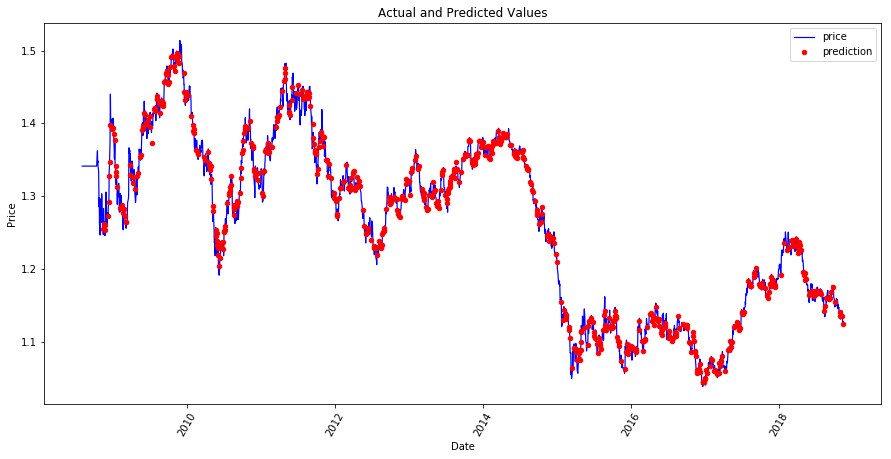

In [290]:
# Use datetime for creating date objects for plotting
import datetime



# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates['Date'], 'price': labels})


# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': dt['Date'], 'prediction': predictions})

# Plot the actual values
plt.plot(true_data['date'], true_data['price'], 'b-', label = 'price')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Price'); plt.title('Actual and Predicted Values');